In [1]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_roc, plot_confusion_matrix

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
df.koi_disposition.value_counts()

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64

In [4]:
labels = {"FALSE POSITIVE":0, "CONFIRMED": 1, "CANDIDATE": 2}

df["koi_disposition_label"] = [labels[x] for x in df.koi_disposition]
df = df.drop("koi_disposition", axis=1)

df.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition_label
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,1


In [5]:
abs(df.corr(method ='pearson')["koi_disposition_label"]).sort_values(ascending=False)

koi_disposition_label    1.000000
koi_fpflag_ss            0.486481
koi_fpflag_co            0.452002
koi_fpflag_nt            0.380710
koi_fpflag_ec            0.339983
koi_steff_err1           0.254084
koi_depth                0.244109
koi_teq                  0.237782
koi_model_snr            0.233840
koi_steff_err2           0.232041
koi_tce_plnt_num         0.135711
koi_duration             0.134811
koi_steff                0.133363
ra                       0.117899
koi_slogg_err2           0.104482
koi_slogg                0.101181
koi_slogg_err1           0.099996
koi_srad_err1            0.077580
dec                      0.072855
koi_impact               0.067744
koi_impact_err1          0.065843
koi_kepmag               0.054859
koi_srad_err2            0.053862
koi_period_err2          0.047197
koi_period_err1          0.047197
koi_srad                 0.045170
koi_prad_err1            0.035515
koi_insol_err1           0.031934
koi_time0bk_err2         0.029161
koi_time0bk_er

In [6]:
# Set features. This will also be used as your x values.
selectedFeatures = df[[
    'koi_disposition_label',
    'koi_fpflag_ss',
    'koi_fpflag_co',
    'koi_fpflag_nt',
    'koi_fpflag_ec',
    'koi_steff_err1',
    'koi_depth',
    'koi_teq',
    'koi_model_snr',
    'koi_steff_err2',
    'koi_tce_plnt_num',
    'koi_duration',
    'koi_steff',
    'ra',
    'koi_slogg_err2',
    'koi_slogg',
    'koi_slogg_err1',
    'koi_srad_err1',
    'dec',
    'koi_impact',
    'koi_impact_err1',
    'koi_kepmag',
    'koi_srad_err2',
    'koi_impact_err1',
    'koi_kepmag',
    'koi_srad_err2'
]]
selectedFeatures.head()

,koi_disposition_label,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_nt,koi_fpflag_ec,koi_steff_err1,koi_depth,koi_teq,koi_model_snr,koi_steff_err2,...,koi_slogg_err1,koi_srad_err1,dec,koi_impact,koi_impact_err1,koi_kepmag,koi_srad_err2,koi_impact_err1,koi_kepmag,koi_srad_err2
0,1,0,0,0,0,81,874.8,443,25.8,-81,...,0.064,0.105,48.141651,0.586,0.059,15.347,-0.061,0.059,15.347,-0.061
1,0,1,0,0,0,158,10829.0,638,76.3,-176,...,0.044,0.233,48.134129,0.969,5.126,15.436,-0.078,5.126,15.436,-0.078
2,0,1,0,0,0,157,8079.2,1395,505.6,-174,...,0.053,0.201,48.285210,1.276,0.115,15.597,-0.067,0.115,15.597,-0.067
3,1,0,0,0,0,169,603.3,1406,40.9,-211,...,0.070,0.334,48.226200,0.701,0.235,15.509,-0.133,0.235,15.509,-0.133
4,1,0,0,0,0,189,686.0,1160,40.2,-232,...,0.054,0.315,48.224670,0.762,0.139,15.714,-0.105,0.139,15.714,-0.105


# Create a Train Test Split

Use `koi_disposition` for the y values

In [7]:
X = selectedFeatures
y = df["koi_disposition_label"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
X_train.head()

,koi_disposition_label,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_nt,koi_fpflag_ec,koi_steff_err1,koi_depth,koi_teq,koi_model_snr,koi_steff_err2,...,koi_slogg_err1,koi_srad_err1,dec,koi_impact,koi_impact_err1,koi_kepmag,koi_srad_err2,koi_impact_err1,koi_kepmag,koi_srad_err2
3563,2,0,0,0,0,120,102.9,899,11.7,-133,...,0.066,0.181,44.737061,1.0170,0.0470,13.204,-0.097,0.0470,13.204,-0.097
4099,1,0,0,0,0,144,593.3,491,18.0,-144,...,0.078,0.056,42.576248,0.7090,0.0230,15.514,-0.076,0.0230,15.514,-0.076
5460,2,0,0,0,0,126,47337.0,1276,476.0,-140,...,0.054,0.054,49.310040,0.2620,0.2740,15.414,-0.060,0.2740,15.414,-0.060
1091,1,0,0,0,0,101,584.8,300,34.7,-112,...,0.072,0.135,48.131390,0.0010,0.4170,13.328,-0.083,0.4170,13.328,-0.083
5999,2,0,0,0,0,164,193.6,568,8.7,-233,...,0.164,0.905,39.812420,0.2136,0.2282,12.964,-0.383,0.2282,12.964,-0.383


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [9]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

model = classifier.fit(X_train, y_train.ravel())

C:\Users\kylec\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\kylec\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kylec\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or s

# Train the Model

In [11]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.6135800114438299
Testing Data Score: 0.6161327231121282


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [12]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'penalty': ["l1", "l2"]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [13]:
# Train the model with GridSearch
grid.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\kylec\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kylec\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kylec\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\kylec\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this 

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l2 .................................................


C:\Users\kylec\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kylec\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=1, penalty=l2, score=0.615, total=   0.2s
[CV] C=1, penalty=l2 .................................................


C:\Users\kylec\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kylec\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\kylec\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or s

[CV] ..................... C=1, penalty=l2, score=0.629, total=   0.3s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.596, total=   0.2s
[CV] C=1, penalty=l2 .................................................


C:\Users\kylec\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kylec\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=1, penalty=l2, score=0.610, total=   0.2s
[CV] C=1, penalty=l2 .................................................


C:\Users\kylec\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kylec\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kylec\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kylec\anaconda3\lib\site-packages\sklearn\linea

[CV] ..................... C=1, penalty=l2, score=0.609, total=   0.2s
[CV] C=5, penalty=l1 .................................................
[CV] ....................... C=5, penalty=l1, score=nan, total=   0.0s
[CV] C=5, penalty=l1 .................................................
[CV] ....................... C=5, penalty=l1, score=nan, total=   0.0s
[CV] C=5, penalty=l1 .................................................
[CV] ....................... C=5, penalty=l1, score=nan, total=   0.0s
[CV] C=5, penalty=l1 .................................................
[CV] ....................... C=5, penalty=l1, score=nan, total=   0.0s
[CV] C=5, penalty=l1 .................................................
[CV] ....................... C=5, penalty=l1, score=nan, total=   0.0s
[CV] C=5, penalty=l2 .................................................
[CV] ..................... C=5, penalty=l2, score=0.626, total=   0.2s
[CV] C=5, penalty=l2 .................................................


C:\Users\kylec\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\kylec\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kylec\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

[CV] ..................... C=5, penalty=l2, score=0.622, total=   0.2s
[CV] C=5, penalty=l2 .................................................


C:\Users\kylec\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kylec\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\kylec\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or s

[CV] ..................... C=5, penalty=l2, score=0.596, total=   0.2s
[CV] C=5, penalty=l2 .................................................
[CV] ..................... C=5, penalty=l2, score=0.610, total=   0.2s
[CV] C=5, penalty=l2 .................................................


C:\Users\kylec\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kylec\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kylec\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kylec\anaconda3\lib\site-packages\sklearn\linea

[CV] ..................... C=5, penalty=l2, score=0.603, total=   0.2s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, penalty=l2 ................................................


C:\Users\kylec\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kylec\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\kylec\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or s

[CV] .................... C=10, penalty=l2, score=0.629, total=   0.2s
[CV] C=10, penalty=l2 ................................................
[CV] .................... C=10, penalty=l2, score=0.626, total=   0.2s
[CV] C=10, penalty=l2 ................................................


C:\Users\kylec\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kylec\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=10, penalty=l2, score=0.596, total=   0.2s
[CV] C=10, penalty=l2 ................................................


C:\Users\kylec\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kylec\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\kylec\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or s

[CV] .................... C=10, penalty=l2, score=0.611, total=   0.2s
[CV] C=10, penalty=l2 ................................................
[CV] .................... C=10, penalty=l2, score=0.607, total=   0.1s


C:\Users\kylec\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2']}, verbose=3)

In [14]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'penalty': 'l2'}
0.61376883837024


C:\Users\kylec\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\kylec\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       909
           1       1.00      1.00      1.00       435
           2       1.00      1.00      1.00       404

    accuracy                           1.00      1748
   macro avg       1.00      1.00      1.00      1748
weighted avg       1.00      1.00      1.00      1748


Confusion Matrix:
[[909   0   0]
 [  0 435   0]
 [  0   0 404]]

ROC Curve:


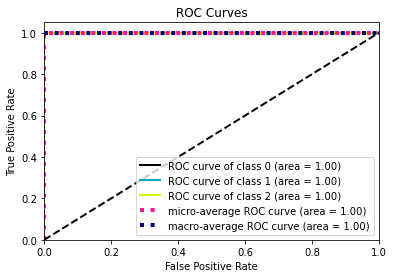

In [15]:
lrc = LogisticRegression() #init
lrc.fit(X_train_scaled, y_train) #fit
preds = lrc.predict(X_test_scaled) #predict
proba_preds = lrc.predict_proba(X_test_scaled) #predict

print("Logistic Regression Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

# Save the Model

In [16]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'kyleLogRegModel.sav'
joblib.dump(model, filename)

['kyleLogRegModel.sav']